# Missing Data and Aggregations

- In real world, there will be missing data and/or unwanted disturbance data

## Setup

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 10

#Creates dummy data
random_matrix = np.random.randint(1,10,(n,n)) #(10,10) gives a matrix/2D-array
index = np.random.choice(random_matrix.size, 10, replace=False) #replace so that we do not use the indexes again
print(index)

#random_matrix*2 #If we multiply an array with 2, all elements will be multiplied (no need to loop through)

random_matrix = random_matrix*1.0 #Creates floats, because None can be changed to a float and not an int
random_matrix.ravel()[index] = None #We crrate missing values at the indexes specified

[ 9 84  6 39 92 33 68 85 20 17]


In [2]:
random_matrix.size #Size is all of the elements in the 2D array

100

In [3]:
random_matrix #We have missing values

array([[ 7.,  4.,  8.,  5.,  7.,  3., nan,  8.,  5., nan],
       [ 8.,  8.,  3.,  6.,  5.,  2.,  8., nan,  2.,  5.],
       [nan,  6.,  9.,  1.,  3.,  7.,  4.,  9.,  3.,  5.],
       [ 3.,  7.,  5., nan,  7.,  2.,  4.,  9.,  2., nan],
       [ 5.,  2.,  4.,  7.,  8.,  3.,  1.,  4.,  2.,  8.],
       [ 4.,  2.,  6.,  6.,  4.,  6.,  2.,  2.,  4.,  8.],
       [ 7.,  9.,  8.,  5.,  2.,  5.,  8.,  9., nan,  1.],
       [ 9.,  7.,  9.,  8.,  1.,  8.,  8.,  3.,  1.,  8.],
       [ 3.,  3.,  1.,  5., nan, nan,  7.,  9.,  8.,  2.],
       [ 1.,  7., nan,  8.,  5.,  3.,  8.,  6.,  3.,  1.]])

In [4]:
scores = pd.DataFrame(random_matrix, index=[f"Player {i}" for i in range(1, n+1)], columns=[f"Round {i}" for i in range(1, n+1)]) #2D array is "listlike"
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,NaN,8.0,5.0,NaN
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,NaN,2.0,5.0
Player 3,NaN,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,NaN,7.0,2.0,4.0,9.0,2.0,NaN
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,NaN,1.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player 9,3.0,3.0,1.0,5.0,NaN,NaN,7.0,9.0,8.0,2.0
Player 10,1.0,7.0,NaN,8.0,5.0,3.0,8.0,6.0,3.0,1.0


In [5]:
scores.info() #Here we can see the number of non-null objects

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Player 1 to Player 10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Round 1   9 non-null      float64
 1   Round 2   10 non-null     float64
 2   Round 3   9 non-null      float64
 3   Round 4   9 non-null      float64
 4   Round 5   9 non-null      float64
 5   Round 6   9 non-null      float64
 6   Round 7   9 non-null      float64
 7   Round 8   9 non-null      float64
 8   Round 9   9 non-null      float64
 9   Round 10  8 non-null      float64
dtypes: float64(10)
memory usage: 880.0+ bytes


## Missing
- isnull() - returns True if null
- notnull() - returns True if not null
- dropna() - drops an axis with nulls
- fillna() - fills the null values with certain value

In [6]:
scores.isnull() #Prints the matrix with True or False

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,False,False,False,False,False,False,True,False,False,True
Player 2,False,False,False,False,False,False,False,True,False,False
Player 3,True,False,False,False,False,False,False,False,False,False
Player 4,False,False,False,True,False,False,False,False,False,True
Player 5,False,False,False,False,False,False,False,False,False,False
Player 6,False,False,False,False,False,False,False,False,False,False
Player 7,False,False,False,False,False,False,False,False,True,False
Player 8,False,False,False,False,False,False,False,False,False,False
Player 9,False,False,False,False,True,True,False,False,False,False
Player 10,False,False,True,False,False,False,False,False,False,False


In [7]:
scores.notnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,True,True,True,True,True,True,False,True,True,False
Player 2,True,True,True,True,True,True,True,False,True,True
Player 3,False,True,True,True,True,True,True,True,True,True
Player 4,True,True,True,False,True,True,True,True,True,False
Player 5,True,True,True,True,True,True,True,True,True,True
Player 6,True,True,True,True,True,True,True,True,True,True
Player 7,True,True,True,True,True,True,True,True,False,True
Player 8,True,True,True,True,True,True,True,True,True,True
Player 9,True,True,True,True,False,False,True,True,True,True
Player 10,True,True,False,True,True,True,True,True,True,True


In [8]:
scores.dropna() #Drops the whole row if missing values

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0


In [9]:
scores.dropna(axis="columns") #axis=0 gives us rows, axis=1 gives us columns, or write axis=columns

,Round 2
Player 1,4.0
Player 2,8.0
Player 3,6.0
Player 4,7.0
Player 5,2.0
Player 6,2.0
Player 7,9.0
Player 8,7.0
Player 9,3.0
Player 10,7.0


In [10]:
#How to treat NaNs?
#It depends on the situation
#Many times need to talk to domain experts
scores.fillna(0) #In this case - may be reasonable to give 0 scores for missing value

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,0.0,8.0,5.0,0.0
Player 2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,0.0,2.0,5.0
Player 3,0.0,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player 4,3.0,7.0,5.0,0.0,7.0,2.0,4.0,9.0,2.0,0.0
Player 5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player 6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player 7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,0.0,1.0
Player 8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player 9,3.0,3.0,1.0,5.0,0.0,0.0,7.0,9.0,8.0,2.0
Player 10,1.0,7.0,0.0,8.0,5.0,3.0,8.0,6.0,3.0,1.0


## Missing value strategy

Strategt depends on:
- Dataset size
- Valuable information (some rows, some columns)
- Percentage missing values
- Domain knowledge
- Missing values can impact:
    - Data visualisation
    - Summary statistics
    - Machine learning algorithms

In [11]:
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
titanic = sns.load_dataset("titanic")
titanic = pd.DataFrame(titanic)

In [17]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age             53
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

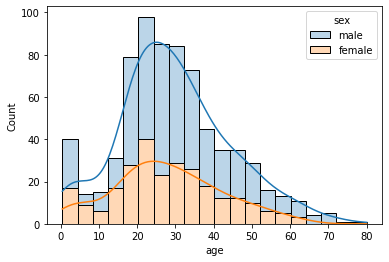

In [13]:
sns.histplot(data=titanic, x="age", kde=True, hue="sex", alpha=.3, multiple="stack") #The grey ones are the women

In [14]:
#Talked to a Titanic historian
#This dude says: use medan age of corresponding gender to fill in ages 

print(f"Number of males {np.sum(titanic['sex'] == 'male')}")
print(f"Number of females {np.sum(titanic['sex'] == 'female')}")

median_male_age = titanic.loc[titanic["sex"] == "male", "age"].median()
median_female_age = titanic.loc[titanic["sex"] == "female", "age"].median()
print(median_male_age, median_female_age)

Number of males 577
Number of females 314
29.0 27.0


In [15]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age) #The ages for men
titanic.loc[titanic["age"]==29, "sex"].value_counts() #Checks how many values are 137

male      137
female      7
Name: sex, dtype: int64

In [16]:
titanic.isnull().sum()["age"]

53

In [18]:
titanic.loc[titanic["sex"] == "female", "age"] = titanic.loc[titanic["sex"] == "female", "age"].fillna(median_female_age)
titanic.loc[titanic["age"]==27, "sex"].value_counts()

female    59
male      12
Name: sex, dtype: int64

In [19]:
titanic.isnull().sum()["age"]

0

<AxesSubplot:xlabel='age', ylabel='Count'>

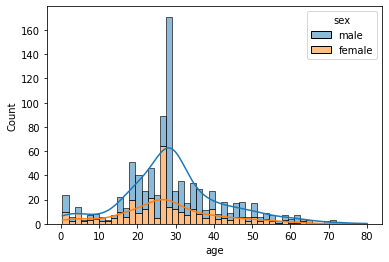

In [22]:
sns.histplot(data=titanic, x="age", kde=True, multiple="stack", hue="sex", bins=50)

In [23]:
# groupby
titanic.groupby("sex").mean() #E.g. the mean for female and males that have survived

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.761146,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.355581,0.429809,0.235702,25.523893,0.930676,0.712305


In [24]:
titanic.groupby("sex").median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,1.0,2.0,27.0,0.0,0.0,23.0,0.0,0.0
male,0.0,3.0,29.0,0.0,0.0,10.5,1.0,1.0


In [25]:
titanic.groupby("sex").max()

/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_1840/3636409492.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  titanic.groupby("sex").max()


,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,man,True,yes,True


In [28]:
titanic.groupby("sex").mean()[["survived", "age"]] #We have to use an aggregate method afterwards
#We picked out the columns survived and age

,survived,age
sex,,
female,0.742038,27.761146
male,0.188908,30.355581
